# SHO Fitting Data

## Import Packages

In [1]:
import sys
sys.path.append('../../')
sys.path.append('C:\codes\m3_learning\m3_learning\src')

In [2]:
# For the notebook to work you must have m3_learning installed
# pip install m3_learning
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.util.file_IO import download_and_unzip
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from IPython.display import Video


# from m3_learning.be.dataset import BE_Dataset
printing = printer(basepath = './Figures/')

set_style("printing")
random_seed(seed=42)

%matplotlib inline

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loading data for SHO fitting


In [3]:
# Download the data file from Zenodo
url = 'https://zenodo.org/record/7774788/files/PZT_2080_raw_data.h5?download=1'

# Specify the filename and the path to save the file
filename = 'data_raw.h5'
save_path = './Data'

# download the file
download_and_unzip(filename, url, save_path)

Using files already downloaded


In [4]:
data_path = save_path + '/' + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Raw_Data-SHO_Fit_000
  --------------------
  ├ Fit
  ├ Guess
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
  ├ completed_fit_positions
  ├ completed_guess_positions
Datasets and

## Visualize Raw Data

### Raw Cantilever Response


In [5]:
# insatiate the visualization object
image_scalebar = [2000, 500, "nm", "br"]

BE_viz = Viz(dataset, printing, verbose=True, 
             SHO_ranges = [(0,1.5e-4), (1.31e6, 1.33e6), (-300, 300), (-np.pi, np.pi)], 
             image_scalebar = image_scalebar)

True 


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
    loop interpolated = False
                  
./Figures/Figure_1_raw_cantilever_response.png
./Figures/Figure_1_raw_cantilever_response.svg


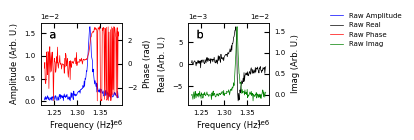

In [6]:
prediction = {"resampled": False,
              "label": "Raw"}

BE_viz.raw_data_comparison(prediction, filename="Figure_1_raw_cantilever_response")

**Figure 1.** Raw cantilever response. a) Magnitude spectrum and Phase, b) real and imaginary parts of the complex spectrum.


### Band-Excitation Experiments

c:\Users\jca92\.conda\envs\m3_learning\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


./Figures/Figure_2_raw_be_experiment.png
./Figures/Figure_2_raw_be_experiment.svg


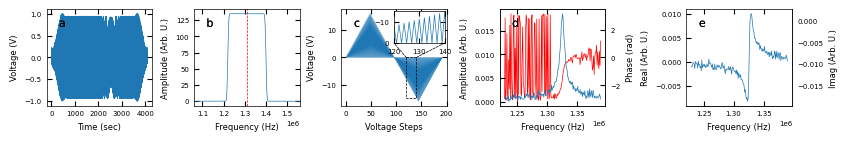

In [7]:
BE_viz.raw_be(dataset, filename="Figure_2_raw_be_experiment")

**Figure 2.** Band-Excitation Experiments. a) Raw drive amplitude applied to the tip, b) Energy of the waveform in the frequency domain, c) DC voltage applied to switch the sample, inset shows a zoomed in view of the switching waveform where measurements are made in the on and off state. d) raw cantilever response magnitude and phase, e) real and imaginary parts of the complex spectrum.

## SHO Fitting
**Note**: this code takes around 15 minutes to execute

If you downloaded the SHO fit data, or ran notebook 0_5 you do not need to fit the data again. You can skip to the next section.

In [8]:
Fit_SHO = False

if Fit_SHO: 

    # # computes the SHO fit for the data in the file
    dataset.SHO_Fitter(force = True)

### Views the Distribution of the Least Squares Fitting (LSQF) results

It is good to view the distributions and standardize the phase shift. The phase shift is rotated around the unit circle such that the peaks are at $-\pi/2$ and $\pi/2$


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 0
    NN Phase Shift = None
    Noise Level = 0
    loop interpolated = False
                  
./Figures/Figure_3_Original_LSQF_Histograms.png
./Figures/Figure_3_Original_LSQF_Histograms.svg


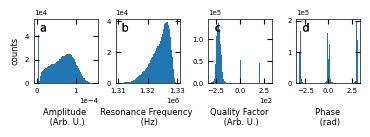

In [9]:
dataset.LSQF_phase_shift = 0

BE_viz.SHO_hist(dataset.SHO_fit_results(),
                      filename="Figure_3_Original_LSQF_Histograms")


**Figure 3.** Distribution of the Least Squares Fitting (LSQF) results of the unmodified data. a) Distribution of the amplitude, b) Distribution of the resonance frequency, c) Distribution of the quality factor, d) Distribution of the resonance frequency.


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
    loop interpolated = False
                  
./Figures/Figure_4_Phase_Shifted_LSQF_Histograms.png
./Figures/Figure_4_Phase_Shifted_LSQF_Histograms.svg


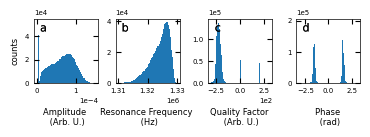

In [10]:
dataset.LSQF_phase_shift = np.pi/2

BE_viz.SHO_hist(dataset.SHO_fit_results(),
                      filename="Figure_4_Phase_Shifted_LSQF_Histograms")

**Figure 4.** Distribution of the Least Squares Fitting (LSQF) results of the unmodified data. a) Distribution of the amplitude, b) Distribution of the resonance frequency, c) Distribution of the quality factor, d) Distribution of the resonance frequency.

### Plots the SHO Fit Results


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = on
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
    loop interpolated = False
                  
./Figures/Figure_5_Single_Pixel_Loops.png
./Figures/Figure_5_Single_Pixel_Loops.svg


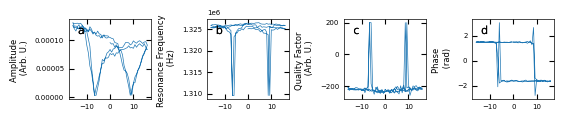

In [11]:
dataset.measurement_state ='on'

BE_viz.SHO_loops(filename="Figure_5_Single_Pixel_Loops")


**Figure 5.** Example switching loops obtained for the amplitude, resonance frequency, quality factor, and phase.

## SHO Switching Movies

In [13]:
BE_viz.SHO_fit_movie_images(noise = 0, 
                            scalebar_= True, 
                            basepath = "Movies/SHO_LSQF_",  
                            filename="SHO_LSQF",
                            phase_shift = [np.pi/2])

Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0000.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0001.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0002.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0003.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0004.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0005.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0006.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0007.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0008.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0009.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0010.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0011.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0012.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0013.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0014.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0015.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0016.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0017.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0018.png
Movies/SHO_LSQF_Noise_0/SHO_LSQF_noise_0_0019.png
